In [1]:
import pandas as pd
import plotly.express as px

In [2]:
data_def = pd.read_csv('/Users/amitmishra/fbref-analytics/data/player_defense_2025_cleaned.csv')
data_poss = pd.read_csv('/Users/amitmishra/fbref-analytics/data/player_possession_2025_cleaned.csv')
data_gca = pd.read_csv('/Users/amitmishra/fbref-analytics/data/player_gca_2025_cleaned.csv')

In [3]:
data_def.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Tkl_attempted,TklW,Tkl_Def,...,Drib_Tkl%,Chal_Lost,Blocks,Shots_blocked,Pass_blocked,Interceptions,Tkl+Int,Clr,Err_shot,Matches
0,Luis Abram,pe PER,DF,Atlanta Utd,29-067,1996,6.8,5,2,4,...,50.0,4,5,2,3,1,6,31,0,Matches
1,Lalas Abubakar,gh GHA,DF,FC Dallas,30-131,1994,2.0,5,4,2,...,75.0,1,2,1,1,5,10,16,0,Matches
2,Kellyn Acosta,us USA,MF,Chicago Fire,29-285,1995,4.3,4,2,2,...,50.0,2,3,0,3,5,9,6,0,Matches
3,Luciano Acosta,ar ARG,MF,FC Dallas,30-339,1994,10.2,15,12,3,...,33.3,12,8,0,8,3,18,10,0,Matches
4,Sam Adekugbe,ca CAN,DF,Vancouver W'caps,30-109,1995,1.9,1,1,0,...,100.0,0,1,0,1,3,4,4,0,Matches


### Right-back position specific filtering

In [4]:
#Merge columns first

In [5]:
data_def.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'Tkl_attempted', 'TklW', 'Tkl_Def', 'Tkl_Mid', 'Tkl_Att', 'Drib_Tkl',
       'Drib_chal', 'Drib_Tkl%', 'Chal_Lost', 'Blocks', 'Shots_blocked',
       'Pass_blocked', 'Interceptions', 'Tkl+Int', 'Clr', 'Err_shot',
       'Matches'],
      dtype='object')

In [6]:
def_stats = ['Player', 'Pos', 'Squad', '90s','Born','Tkl_attempted', 'TklW', 'Tkl_Def', 'Tkl_Mid', 'Tkl_Att', 
             'Drib_Tkl', 'Drib_chal', 'Drib_Tkl%', 'Interceptions', 'Blocks', 'Clr']

poss_stats = ['Player','Touches', 'Touches_Def3rd', 'Touches_Mid3rd', 'Touches_Att3rd', 'TO_Att', 'TO_Succ', 'TO_Succ%','Carries', 
              'PrgDist', 'PrgC', 'Carry1/3','Pass_Rec', 'Pass_PrgR']

gca_stats = ['Player','SCA90','SCA_PassLive','GCA90']

In [7]:
base_df = data_def[def_stats]
df = base_df.merge(data_poss[poss_stats], on = 'Player', how = 'left')
df = df.merge(data_gca[gca_stats],on = 'Player', how = 'left')

In [8]:
df.head()

,Player,Pos,Squad,90s,Born,Tkl_attempted,TklW,Tkl_Def,Tkl_Mid,Tkl_Att,...,TO_Succ%,Carries,PrgDist,PrgC,Carry1/3,Pass_Rec,Pass_PrgR,SCA90,SCA_PassLive,GCA90
0,Luis Abram,DF,Atlanta Utd,6.8,1996,5,2,4,1,0,...,NaN,252,706,4,4,298,3,0.29,2,0.00
1,Lalas Abubakar,DF,FC Dallas,2.0,1994,5,4,2,2,1,...,NaN,56,113,1,1,75,1,0.99,1,0.00
2,Kellyn Acosta,MF,Chicago Fire,4.3,1995,4,2,2,2,0,...,0.0,150,192,3,2,192,4,1.16,5,0.00
3,Luciano Acosta,MF,FC Dallas,10.2,1994,15,12,3,6,6,...,34.9,321,946,35,25,424,76,5.02,35,0.20
4,Sam Adekugbe,DF,Vancouver W'caps,1.9,1995,1,1,0,1,0,...,0.0,109,244,6,1,136,19,2.63,5,0.00


In [9]:
df = df[df['Player']!='Player']

### Feature engineering

#### - Progression Ability = (Progressive passes + Progressive carries) / 90
#### - Defensive Reliability = (Successful tackles + Interceptions + Recoveries) / 90
#### - Crossing Efficiency = Successful crosses / Total crosses


In [10]:
df.dtypes

Player            object
Pos               object
Squad             object
90s               object
Born              object
Tkl_attempted     object
TklW              object
Tkl_Def           object
Tkl_Mid           object
Tkl_Att           object
Drib_Tkl          object
Drib_chal         object
Drib_Tkl%         object
Interceptions     object
Blocks            object
Clr               object
Touches           object
Touches_Def3rd    object
Touches_Mid3rd    object
Touches_Att3rd    object
TO_Att            object
TO_Succ           object
TO_Succ%          object
Carries           object
PrgDist           object
PrgC              object
Carry1/3          object
Pass_Rec          object
Pass_PrgR         object
SCA90             object
SCA_PassLive      object
GCA90             object
dtype: object

In [11]:

convert_dict = {
    # String columns
    'Player': 'object',
    'Pos': 'object',
    'Squad': 'object',
    
    # Integer columns
    '90s':'float',
    'TklW': 'int',
    'Tkl_Def': 'int',
    'Tkl_Mid': 'int',
    'Tkl_Att': 'int',
    'Drib_Tkl': 'int',
    'Drib_chal': 'int',
    'Interceptions': 'int',
    'Blocks': 'int',
    'Clr': 'int',
    'Touches': 'int',
    'Touches_Def3rd': 'int', 
    'Touches_Mid3rd': 'int',
    'Touches_Att3rd': 'int',
    'TO_Att': 'int',
    'TO_Succ': 'int',
    'Carries': 'int',
    'PrgC': 'int',
    'Carry1/3': 'int',
    'Pass_Rec': 'int',
    'Pass_PrgR': 'int',
    'SCA_PassLive': 'int',
    
    # Float columns
    'Tkl_attempted': 'float',
    'Drib_Tkl%': 'float',
    'TO_Succ%': 'float',
    'PrgDist': 'float',
    'SCA90': 'float',
    'GCA90': 'float'
}


In [12]:
df.isna().sum()

Player              0
Pos                 0
Squad               0
90s                 0
Born                1
Tkl_attempted       0
TklW                0
Tkl_Def             0
Tkl_Mid             0
Tkl_Att             0
Drib_Tkl            0
Drib_chal           0
Drib_Tkl%         131
Interceptions       0
Blocks              0
Clr                 0
Touches             0
Touches_Def3rd      0
Touches_Mid3rd      0
Touches_Att3rd      0
TO_Att              0
TO_Succ             0
TO_Succ%          165
Carries             0
PrgDist             0
PrgC                0
Carry1/3            0
Pass_Rec            0
Pass_PrgR           0
SCA90               0
SCA_PassLive        0
GCA90               0
dtype: int64

In [13]:
df = df.fillna(0)

In [14]:
df = df.astype(convert_dict)

In [15]:
df['Prog_Skill'] = (df['PrgC'] + df['Pass_PrgR'])/90
df['Def_Skill'] = (df['TklW'] + df['Interceptions'])/90
df['Att_Skill'] =  df['SCA90'] + df['GCA90']
df['Att_Def_Balance'] = df['Territorial_Balance'] = (df['Touches_Att3rd'] / df['Touches']) / ((df['Touches_Def3rd'] / df['Touches']) + 0.001)

In [16]:
df.head()

,Player,Pos,Squad,90s,Born,Tkl_attempted,TklW,Tkl_Def,Tkl_Mid,Tkl_Att,...,Pass_Rec,Pass_PrgR,SCA90,SCA_PassLive,GCA90,Prog_Skill,Def_Skill,Att_Skill,Att_Def_Balance,Territorial_Balance
0,Luis Abram,DF,Atlanta Utd,6.8,1996,5.0,2,4,1,0,...,298,3,0.29,2,0.0,0.077778,0.033333,0.29,0.106371,0.106371
1,Lalas Abubakar,DF,FC Dallas,2.0,1994,5.0,4,2,2,1,...,75,1,0.99,1,0.0,0.022222,0.100000,0.99,0.213797,0.213797
2,Kellyn Acosta,MF,Chicago Fire,4.3,1995,4.0,2,2,2,0,...,192,4,1.16,5,0.0,0.077778,0.077778,1.16,0.580923,0.580923
3,Luciano Acosta,MF,FC Dallas,10.2,1994,15.0,12,3,6,6,...,424,76,5.02,35,0.2,1.233333,0.166667,5.22,5.237274,5.237274
4,Sam Adekugbe,DF,Vancouver W'caps,1.9,1995,1.0,1,0,1,0,...,136,19,2.63,5,0.0,0.277778,0.044444,2.63,2.101322,2.101322


In [17]:
df['Pos'].value_counts()

Pos
DF       231
MF       139
FW       111
MF,FW     85
FW,MF     80
GK        52
DF,MF     29
MF,DF     17
DF,FW     12
FW,DF      6
Name: count, dtype: int64

In [18]:
df_defenders = df[df['Pos'].str.contains('MF')]

In [19]:
#Filtering for at least

df_defenders = df_defenders[df_defenders['90s'] > 6.0].reset_index(drop = True)

In [20]:
df_defenders.shape

(126, 37)

In [21]:
# First calculate each player's per-90 values
df_defenders['Def_Skill_90'] = df_defenders['Def_Skill'] / df_defenders['90s']
df_defenders['Att_Skill_90'] = df_defenders['Att_Skill'] / df_defenders['90s']

# Then calculate midpoints of these per-90 values
x_midpoint = df_defenders['Def_Skill_90'].mean()
y_midpoint = df_defenders['Att_Skill_90'].mean()

# Create scatter plot using these calculated fields
fig_Def_Att = px.scatter(
    df_defenders, 
    x='Def_Skill_90', 
    y='Att_Skill_90', 
    size='Att_Def_Balance', 
    hover_name='Att_Def_Balance', 
    text='Player', 
    color='Player'
)

# Add quadrant lines
fig_Def_Att.add_hline(y=y_midpoint, line_dash="dash", line_color="gray")
fig_Def_Att.add_vline(x=x_midpoint, line_dash="dash", line_color="gray")

# Update layout
fig_Def_Att.update_traces(textposition='bottom center', textfont=dict(size=10))
fig_Def_Att.update_layout(
    xaxis_title='Defensive Skill Rating',
    yaxis_title='Attacking skill Rating',
    width=1200, height=700, paper_bgcolor='White',
    title={
        'text': '<b>MLS 2025: Defensive vs Attacking Skills (Midfielders) </b><br><sup>Data Source: Fbref</sup>',
        'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'
    }
)

### Feature Weighting and Similarity Model

In [22]:
# Define weights based on Minnesota's playing style requirements for right-backs
feature_weights = {
    'Prog_Skill': 0.25,     # Importance of progression ability
    'Def_Skill': 0.30,      # Defensive solidity is key for right-back
    'Att_Skill': 0.20,      # Attacking contribution
    'Att_Def_Balance': 0.15, # Balance between phases
    'Territorial_Balance': 0.10  # Position coverage
}

# Apply weights to create features
df_defenders['Weighted_Score'] = (
    df_defenders['Prog_Skill'] * feature_weights['Prog_Skill'] +
    df_defenders['Def_Skill'] * feature_weights['Def_Skill'] +
    df_defenders['Att_Skill'] * feature_weights['Att_Skill'] +
    df_defenders['Att_Def_Balance'] * feature_weights['Att_Def_Balance'] +
    df_defenders['Territorial_Balance'] * feature_weights['Territorial_Balance']
)

In [23]:
df_defenders[df_defenders['Squad'] == 'Minnesota Utd']

,Player,Pos,Squad,90s,Born,Tkl_attempted,TklW,Tkl_Def,Tkl_Mid,Tkl_Att,...,SCA_PassLive,GCA90,Prog_Skill,Def_Skill,Att_Skill,Att_Def_Balance,Territorial_Balance,Def_Skill_90,Att_Skill_90,Weighted_Score
64,Robin Lod,"MF,FW",Minnesota Utd,8.4,1993,15.0,11,10,3,2,...,21,0.36,0.300000,0.188889,3.34,1.174016,1.174016,0.022487,0.397619,1.093171
88,Joaquín Pereyra,MF,Minnesota Utd,8.9,1998,27.0,13,12,9,6,...,26,0.45,0.644444,0.255556,5.81,1.907578,1.907578,0.028714,0.652809,1.876672
112,Wil Trapp,MF,Minnesota Utd,9.7,1993,22.0,14,14,5,3,...,10,0.00,0.077778,0.355556,1.14,0.530249,0.530249,0.036655,0.117526,0.486673


### Similarity calculation

In [24]:


import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cosine, euclidean

# Standardize the features
features = ['Prog_Skill', 'Def_Skill', 'Att_Skill', 'Att_Def_Balance', 'Territorial_Balance']
X = df_defenders[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create DataFrame with scaled values
df_scaled = pd.DataFrame(X_scaled, columns=features, index=df_defenders.index)

# Find current Minnesota United right-back
current_mf = "Robin Lod"  # Replace with actual player name
if current_mf in df_defenders['Player'].values:
    # Get current RB's scaled values as a reference point
    reference_player = df_scaled[df_defenders['Player'] == current_mf].iloc[0].values
    
    # Calculate similarity for each player (using cosine similarity)
    similarities = []
    for idx, row in df_scaled.iterrows():
        # Cosine similarity (1 is most similar, 0 is dissimilar)
        sim = 1 - cosine(row.values, reference_player) 
        similarities.append(sim)
    
    df_defenders['Similarity_Score'] = similarities

### Minnesota Compatibility Score

In [25]:
# Calculate overall compatibility score (0-100 scale)
# Combine weighted metrics and similarity to current player

# Define minimum thresholds for non-negotiable requirements
min_thresholds = {
    'Def_Skill': 0.05,  # Must have basic defensive capability
    'Prog_Skill': 0.08  # Must be able to progress the ball
}

# Apply thresholds
df_defenders['Meets_Thresholds'] = (
    (df_defenders['Def_Skill'] >= min_thresholds['Def_Skill']) & 
    (df_defenders['Prog_Skill'] >= min_thresholds['Prog_Skill'])
)

# Calculate final Minnesota United Compatibility Score
df_defenders['MNU_Compatibility'] = df_defenders['Weighted_Score'] * 70 + df_defenders['Similarity_Score'] * 30
df_defenders.loc[~df_defenders['Meets_Thresholds'], 'MNU_Compatibility'] = 0  # Zero score if thresholds not met

###  Recruitment Shortlist

In [26]:
# Filter for midfielders only
mf_candidates = df_defenders[df_defenders['Pos'] == 'MF'].copy()

# Sort by compatibility score
mf_shortlist = mf_candidates.sort_values('MNU_Compatibility', ascending=False)

# Display top 10 candidates with key metrics
top_candidates = mf_shortlist.head(10)[['Player', 'Prog_Skill', 'Def_Skill', 
                                       'Att_Skill', 'Att_Def_Balance',
                                       'Similarity_Score', 'MNU_Compatibility']]

print("Top 10 Midfielder Targets for Minnesota United:")
top_candidates

Top 10 Midfielder Targets for Minnesota United:


,Player,Prog_Skill,Def_Skill,Att_Skill,Att_Def_Balance,Similarity_Score,MNU_Compatibility
42,Emil Forsberg,0.733333,0.077778,3.76,25.288329,-0.723735,487.940382
46,Carles Gil,0.855556,0.155556,5.62,5.302227,-0.486230,175.120961
110,Quinn Sullivan,1.177778,0.200000,5.34,5.512256,-0.702664,174.955687
0,Luciano Acosta,1.233333,0.166667,5.22,5.237274,-0.713262,168.417774
45,Manu García,0.577778,0.144444,4.82,5.203275,-0.363065,160.789809
72,Maximiliano Moralez,0.722222,0.166667,4.82,4.602530,-0.450017,150.662637
88,Joaquín Pereyra,0.644444,0.255556,5.81,1.907578,0.224534,138.103090
115,Obed Vargas,0.533333,0.344444,5.66,1.576436,0.294607,132.232497
49,Brian Gutiérrez,0.500000,0.155556,5.05,1.971455,0.432586,130.194688
9,Eduard Atuesta,0.266667,0.144444,5.70,1.063788,0.638300,125.265303


### Visualize Targets vs. Current Midfielder using mplsoccer pizza charts

In [29]:
import matplotlib.pyplot as plt
from highlight_text import fig_text

from mplsoccer import PyPizza, FontManager

In [30]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')


In [ ]:
df_defenders[df_defenders['Squad'] == 'Minnesota Utd']
top_candidates

In [ ]:
params = [Prog_Skill,	Def_Skill,	Att_Skill,	Att_Def_Balance,	Similarity_Score,	MNU_Compatibility]

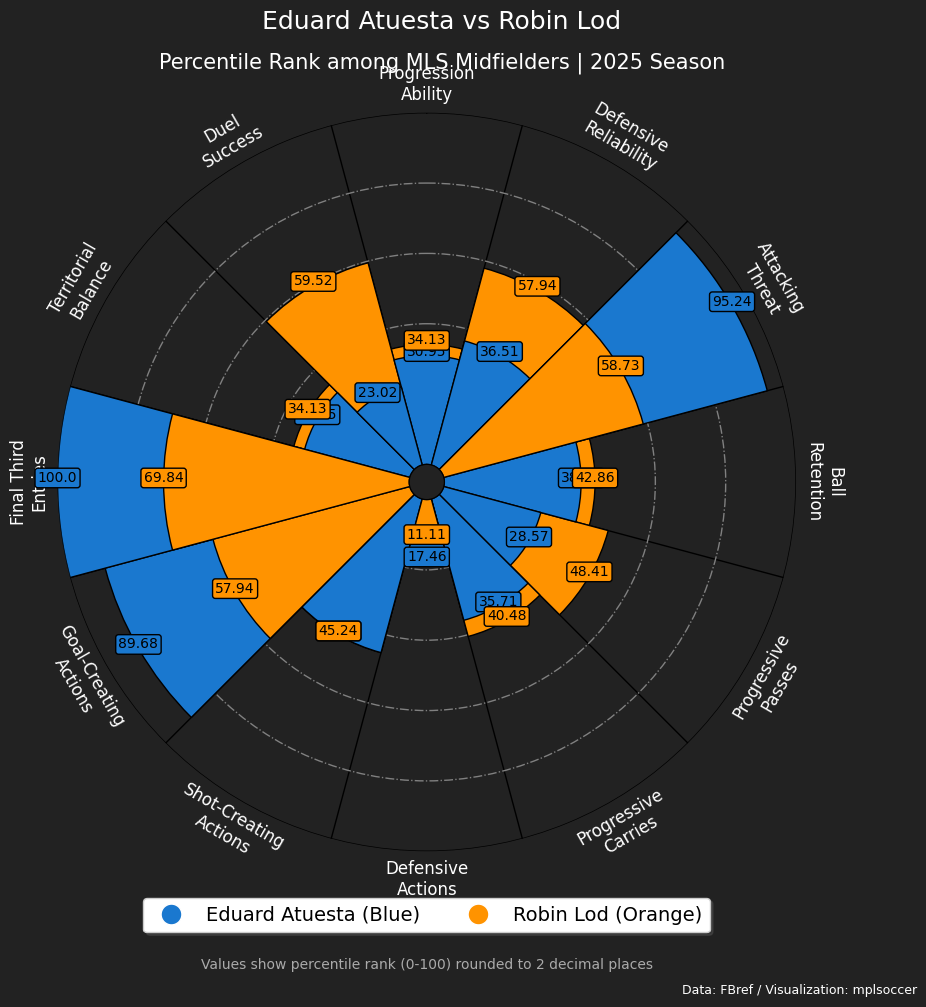

In [39]:
# Pizza chart code for midfielder comparison - fixed version

# Import libraries
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define parameters for midfielders
params = [
    "Progression\nAbility", "Defensive\nReliability", "Attacking\nThreat",
    "Ball\nRetention", "Progressive\nPasses", "Progressive\nCarries",
    "Defensive\nActions", "Shot-Creating\nActions", "Goal-Creating\nActions",
    "Final Third\nEntries", "Territorial\nBalance", "Duel\nSuccess"
]

# Define which metrics to use for each parameter
metric_mapping = {
    "Progression\nAbility": "Prog_Skill",
    "Defensive\nReliability": "Def_Skill",
    "Attacking\nThreat": "Att_Skill",
    "Territorial\nBalance": "Territorial_Balance",
    "Ball\nRetention": "TO_Succ%",
    "Progressive\nPasses": "Pass_PrgR",
    "Progressive\nCarries": "PrgC",
    "Defensive\nActions": "Interceptions",
    "Shot-Creating\nActions": "SCA90",
    "Goal-Creating\nActions": "GCA90",
    "Final Third\nEntries": "Touches_Att3rd",
    "Duel\nSuccess": "Drib_Tkl%"
}

# Get the features to use from mapping
features_to_use = list(metric_mapping.values())

# Get current midfielder name and check if they exist in the dataframe
current_mf = "Robin Lod"
target_mf_name = "Eduard Atuesta"

# Safely get player data - check if player exists first
def get_player_safely(player_name, df_defenders):
    player_data = df_defenders[df_defenders['Player'] == player_name]
    if len(player_data) > 0:
        return player_data.iloc[0]
    else:
        print(f"Player '{player_name}' not found in dataset.")
        return None

# Convert values to percentiles
def get_percentile_values(player_row, df_defenders, features):
    """Convert raw values to percentile ranks (0-100)"""
    percentiles = []
    if player_row is None:
        return [50] * len(features)  # Use 50th percentile as placeholder
        
    for feature in features:
        if feature in player_row and feature in df_defenders.columns:
            # Calculate percentile rank
            pct = 100 * (df_defenders[feature] <= player_row[feature]).mean()
            # Round to 2 decimal places
            pct = round(pct, 2)
            percentiles.append(pct)
        else:
            percentiles.append(50)
    return percentiles

# Get player data
current_mf_row = get_player_safely(current_mf, df_defenders)
target_mf_row = get_player_safely(target_mf_name, df_defenders)

# Get percentile values
current_values = get_percentile_values(current_mf_row, df_defenders, features_to_use)
target_values = get_percentile_values(target_mf_row, df_defenders, features_to_use)

# Instantiate PyPizza class
baker = PyPizza(
    params=params,
    background_color="#222222",
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    last_circle_color="#000000",
    other_circle_ls="-.",
    other_circle_lw=1
)

# Plot pizza - use standard parameters without format_strings
fig, ax = baker.make_pizza(
    target_values,
    compare_values=current_values,
    figsize=(10, 10),
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                             
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#000000",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#FFFFFF", fontsize=12,
        va="center"
    ),                         
    # Basic value display without custom formatting
    kwargs_values=dict(
        color="#000000", fontsize=10,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                     
    kwargs_compare_values=dict(
        color="#000000", fontsize=10, 
        zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                      
)

# Create a custom legend with player names and percentile ranges
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1A78CF', 
              markersize=15, label=f"{target_mf_name} (Blue)"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF9300', 
              markersize=15, label=f"{current_mf} (Orange)")
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05),
         fancybox=True, shadow=True, ncol=2, fontsize=14)

# Add title
fig.text(
    0.515, 0.97, f"{target_mf_name} vs {current_mf}", size=18,
    ha="center", color="#FFFFFF"
)

# Add subtitle
fig.text(
    0.515, 0.93,
    "Percentile Rank among MLS Midfielders | 2025 Season",
    size=15,
    ha="center", color="#FFFFFF"
)

# Add a note about values
fig.text(
    0.5, 0.03, "Values show percentile rank (0-100) rounded to 2 decimal places",
    size=10, ha="center", color="#AAAAAA"
)

# Add credits
fig.text(
    0.99, 0.005, "Data: FBref / Visualization: mplsoccer", size=9,
    color="#FFFFFF", ha="right"
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [44]:
def generate_player_comparison_charts(current_team_df, shortlist_df, output_folder="player_comparisons"):
    """
    Generate pizza charts comparing Minnesota United's current players with shortlisted targets.
    
    Parameters:
    -----------
    current_team_df : DataFrame
        DataFrame containing Minnesota's current players (filtered with Squad == 'Minnesota Utd')
    shortlist_df : DataFrame
        DataFrame containing shortlisted players for recruitment
    output_folder : str
        Folder to save the generated charts (will be created if it doesn't exist)
    """
    import os
    import matplotlib.pyplot as plt
    import numpy as np
    from mplsoccer import PyPizza
    
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Define parameters for player comparisons - reduced number of parameters for better readability
    params = [
        "Progression\nAbility", "Defensive\nReliability", "Attacking\nThreat",
        "Ball\nRetention", "Progressive\nPasses", "Progressive\nCarries",
        "Defensive\nActions", "Shot-Creating\nActions", "Goal-Creating\nActions",
        "Final Third\nEntries", "Territorial\nBalance", "Duel\nSuccess"
    ]
    
    # Define metrics mapping (adjust based on your available columns)
    metric_mapping = {
        "Progression\nAbility": "Prog_Skill",
        "Defensive\nReliability": "Def_Skill",
        "Attacking\nThreat": "Att_Skill",
        "Territorial\nBalance": "Att_Def_Balance",  # Using this as a proxy
        "Ball\nRetention": "TO_Succ%",
        "Progressive\nPasses": "Pass_PrgR",
        "Progressive\nCarries": "PrgC",
        "Defensive\nActions": "Tkl_Def",  # Using tackles in defensive third
        "Shot-Creating\nActions": "SCA_PassLive",
        "Goal-Creating\nActions": "GCA90",
        "Final Third\nEntries": "Touches_Att3rd",
        "Duel\nSuccess": "TklW"  # Using successful tackles
    }
    
    # Get the features to use from mapping
    features_to_use = list(metric_mapping.values())
    
    # Function to calculate percentile ranks
    def get_percentile_values(player_row, reference_df, features):
        """Calculate percentile ranks for a player compared to reference dataset"""
        percentiles = []
        if player_row is None:
            return [50] * len(features)
            
        for feature in features:
            if feature in player_row and feature in reference_df.columns:
                # Calculate percentile rank
                pct = 100 * (reference_df[feature] <= player_row[feature]).mean()
                # Round to 2 decimal places
                pct = round(pct, 2)
                percentiles.append(pct)
            else:
                percentiles.append(50)
        return percentiles
    
    # Combine dataframes for percentile calculation reference
    reference_df = pd.concat([current_team_df, shortlist_df]).drop_duplicates()
    
    # Loop through each shortlisted player and compare with current team players
    for _, target_player in shortlist_df.iterrows():
        target_name = target_player['Player']
        
        # Loop through current team players for comparison
        for _, current_player in current_team_df.iterrows():
            current_name = current_player['Player']
            
            # Skip if comparing a player to themselves
            if target_name == current_name:
                continue
                
            print(f"Generating comparison: {target_name} vs {current_name}")
            
            # Calculate percentile values
            target_values = get_percentile_values(target_player, reference_df, features_to_use)
            current_values = get_percentile_values(current_player, reference_df, features_to_use)
            
            # Create PyPizza instance with improved visibility
            baker = PyPizza(
                params=params,
                background_color="white",  # Changed to white for better contrast
                straight_line_color="#222222",
                straight_line_lw=1,
                last_circle_lw=1,
                last_circle_color="#222222",
                other_circle_ls="-.",
                other_circle_lw=1
            )
            
            # Create figure with larger size for better readability
            fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
            
            # Plot the pizza chart with visible value labels
            baker.make_pizza(
                target_values,
                compare_values=current_values,
                figsize=(12, 12),
                ax=ax,
                kwargs_slices=dict(
                    facecolor="#1A78CF", edgecolor="#000000",
                    zorder=2, linewidth=1, alpha=0.7
                ),                             
                kwargs_compare=dict(
                    facecolor="#FF9300", edgecolor="#000000",
                    zorder=2, linewidth=1, alpha=0.7
                ),
                kwargs_params=dict(
                    color="#000000", fontsize=12, fontweight='bold',
                    va="center", zorder=5
                ),                        
                # Improved value display with value_bboxes
                kwargs_values=dict(
                    color="white", fontsize=11, fontweight='bold',
                    zorder=4, 
                    bbox=dict(
                        boxstyle="round,pad=0.4", fc="#1A78CF",
                        ec="black", lw=1, alpha=1
                    )
                ),                     
                kwargs_compare_values=dict(
                    color="white", fontsize=11, fontweight='bold',
                    zorder=4, 
                    bbox=dict(
                        boxstyle="round,pad=0.4", fc="#FF9300",
                        ec="black", lw=1, alpha=1
                    )
                )                    
            )
            
            # Add whitespace around the chart
            plt.subplots_adjust(top=0.85, bottom=0.15, left=0.1, right=0.9)
            
            # Create a better positioned legend with clearer text
            legend_elements = [
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1A78CF', 
                          markersize=15, label=f"{target_name} (Target)"),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF9300', 
                          markersize=15, label=f"{current_name} (Current)")
            ]
            legend = ax.legend(handles=legend_elements, loc='lower center', 
                       bbox_to_anchor=(0.5, -0.1), frameon=True,
                       fancybox=True, shadow=True, ncol=2, fontsize=12)
            legend.get_frame().set_facecolor('white')
            
            # Add title and subtitles with better positioning and contrast
            plt.title(f"{target_name} vs {current_name}", 
                     size=20, color="black", y=1.05, fontweight='bold')
            
            plt.figtext(0.5, 0.95, "Percentile Rank Comparison", 
                       ha="center", color="#555555", size=16, fontweight='bold')
            
            plt.figtext(0.5, 0.01, "Values show percentile rank (0-100)", 
                       size=12, ha="center", color="#555555")
            
            # Add signature
            plt.figtext(0.99, 0.01, "Minnesota United FC", 
                       size=10, color="#000000", ha="right")
            
            # Set background color for the entire figure
            fig.patch.set_facecolor('white')
            
            # Save with better quality and spacing
            filename = f"{output_folder}/{target_name}_vs_{current_name}.png".replace(" ", "_")
            plt.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.5, 
                       facecolor='white')
            plt.close()
    
    print(f"All comparison charts saved to {output_folder}/")

In [45]:

current_players = df_defenders[df_defenders['Squad'] == 'Minnesota Utd']
generate_player_comparison_charts(current_players, top_candidates)

Generating comparison: Emil Forsberg vs Robin Lod
Generating comparison: Emil Forsberg vs Joaquín Pereyra
Generating comparison: Emil Forsberg vs Wil Trapp
Generating comparison: Carles Gil vs Robin Lod
Generating comparison: Carles Gil vs Joaquín Pereyra
Generating comparison: Carles Gil vs Wil Trapp
Generating comparison: Quinn Sullivan vs Robin Lod
Generating comparison: Quinn Sullivan vs Joaquín Pereyra
Generating comparison: Quinn Sullivan vs Wil Trapp
Generating comparison: Luciano Acosta vs Robin Lod
Generating comparison: Luciano Acosta vs Joaquín Pereyra
Generating comparison: Luciano Acosta vs Wil Trapp
Generating comparison: Manu García vs Robin Lod
Generating comparison: Manu García vs Joaquín Pereyra
Generating comparison: Manu García vs Wil Trapp
Generating comparison: Maximiliano Moralez vs Robin Lod
Generating comparison: Maximiliano Moralez vs Joaquín Pereyra
Generating comparison: Maximiliano Moralez vs Wil Trapp
Generating comparison: Joaquín Pereyra vs Robin Lod
Gen